# Boston House Price
* <font color = 'blue'>'boston.csv' (506 * 14)</font>

 - CRIM: 범죄 발생률
 - ZN: 25,000평방피트를 초과하는 거주 지역의 비율
 -  INDUS: 비소매 상업 지역 비율
 - CHAS: 찰스강 인접 여부(강주변 1, 아니면 0)
 - NOX: 일산화질소 농도
 - RM: 거주 목적 방 개수
 - AGE: 1940년 이전 건축된 주택 비율
 - DIS: 보스턴 5대 고용지역까지 거리
 - RAD: 고속도로 접근성
 - TAX: 10,000달러당 재산세율
 - PTRATIO: 교사와 학생 수 비율
 - B: 흑인 거주 비율
 - LSTAT: 하위 계층 비율
 - <font color = 'red'>PRICE: 주택 가격 -> 'y'

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Data Load
* 'boston.csv' Github에서 읽어오기

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/boston.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [3]:
DF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# II. 탐색적 데이터 분석(EDA)

> ## 1) 'PRICE' 분포

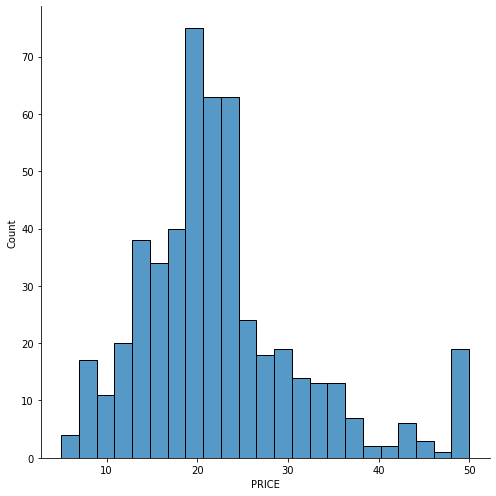

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(x = 'PRICE',
            data = DF,
            height = 7)
plt.show()

* 'PRICE' 평균

In [5]:
DF['PRICE'].mean()

22.532806324110677

> ## 2) 상관계수 ('r')

* 전체 데이터

In [6]:
DF.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


* HeatMap Visualization

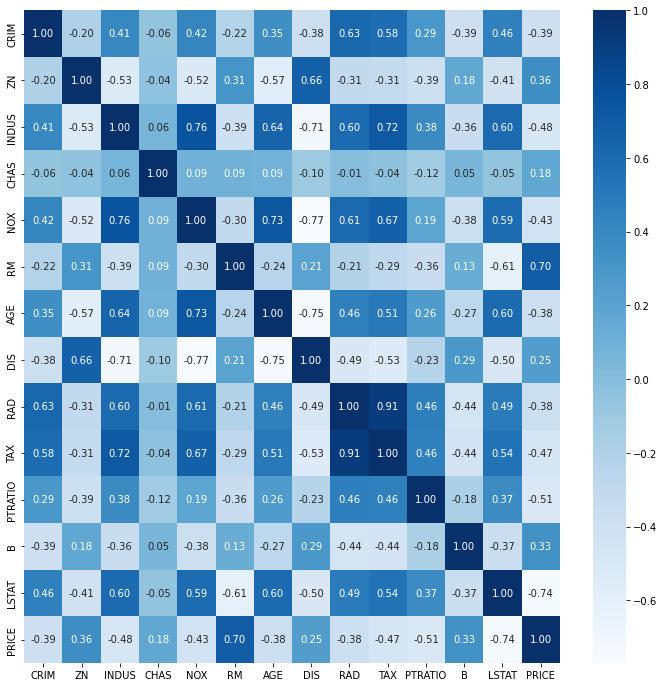

In [7]:
plt.figure(figsize = (12, 12))
sns.heatmap(DF.corr(),
            annot = True,
            cmap = 'Blues',
            fmt = '.2f')
plt.show()

> ## 3) 연속형 변수 상관계수 ('r')

* 'PRICE'와 나머지 변수 간 상관계수 내림차순 정렬

In [8]:
DF.corr().loc[:'LSTAT', 'PRICE'].abs().sort_values(ascending = False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: PRICE, dtype: float64

* 6위까지 추출

In [9]:
DF_reg = DF.loc[:, ['PRICE', 'LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']].copy()

DF_reg.head()

,PRICE,LSTAT,RM,PTRATIO,INDUS,TAX,NOX
0,24.0,4.98,6.575,15.3,2.31,296.0,0.538
1,21.6,9.14,6.421,17.8,7.07,242.0,0.469
2,34.7,4.03,7.185,17.8,7.07,242.0,0.469
3,33.4,2.94,6.998,18.7,2.18,222.0,0.458
4,36.2,5.33,7.147,18.7,2.18,222.0,0.458


> ## 4) 'PRICE'와 6위까지 변수간 시각화

* 회귀모델 시각화

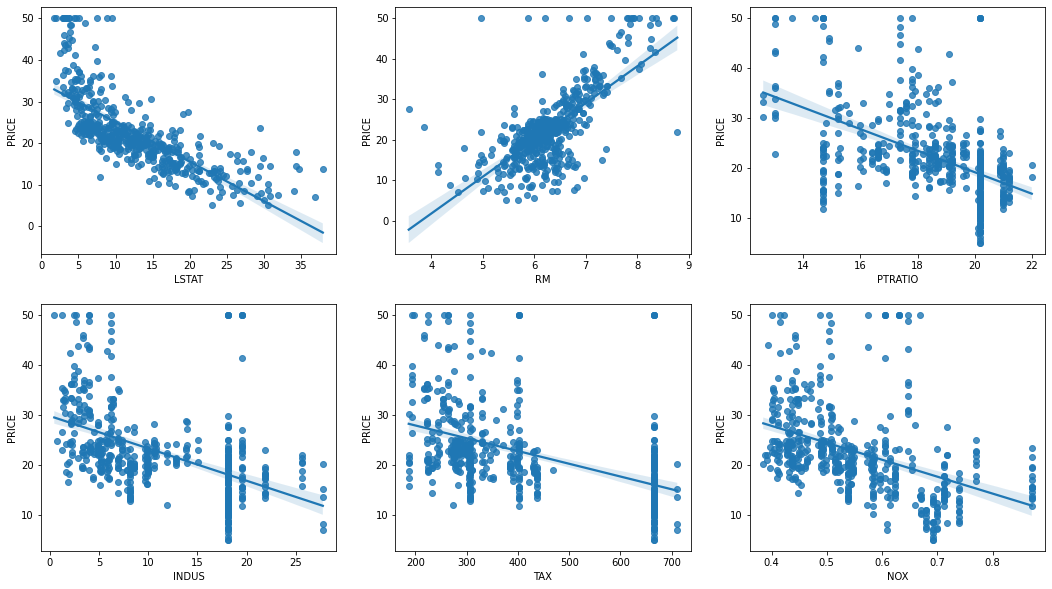

In [10]:
plt.figure(figsize = (18, 10))

for index, col_names in enumerate(DF_reg.columns[1:]):
  ax1 = plt.subplot(2, 3, index + 1)
  sns.regplot(x = col_names,
              y = DF_reg.columns[0],
              data = DF_reg,
              ax = ax1)

plt.show()

* 연속형 변수간 상관관계 ('r') 확인

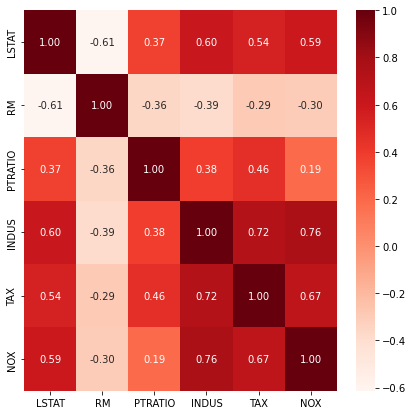

In [11]:
plt.figure(figsize = (7, 7))
sns.heatmap(DF_reg.loc[:,'LSTAT':].corr(),
            annot = True,
            cmap = 'Reds',
            fmt = '.2f')
plt.show()

# III. train_test_split( )

* 8 : 2
 - random_state = 2045

In [12]:
from sklearn.model_selection import train_test_split

X = DF.iloc[:, :-1]
y = DF.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (404, 13) (404,)
Test Data :  (102, 13) (102,)


# IV. Modeling - Multivariate Regression

> ## 1) 모델 생성

In [13]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression()

MR.fit(X_train, y_train)

LinearRegression()

> ## 2) 모델 평가

### (1) Mean Squared Error (MSE)

In [14]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, MR.predict(X_test))

18.99725119559331

### (2) Root Mean Squared Error (RMSE)

In [15]:
mean_squared_error(y_test, MR.predict(X_test), squared = False)

4.358583622645471

### (3) R-Sqaure

In [16]:
from sklearn.metrics import r2_score

r2_score(y_test, MR.predict(X_test))

0.723426946197399

### (4) Mean Absolute Error (MAE)

In [17]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, MR.predict(X_test))

3.2994858122437907

### (5) Mean Squared Log Error (MSLE)

In [18]:
import numpy as np

mean_squared_error(np.log1p(y_test), np.log1p(MR.predict(X_test)))

0.059690723514101075

### (6) Root Mean Squared Log Error (RMSLE)

In [19]:
mean_squared_error(np.log1p(y_test), np.log1p(MR.predict(X_test)), squared = False)

0.24431685065525274

> ## 3) 회귀계수

* Coefficient

In [20]:
MR.coef_

array([-7.49312542e-02,  3.79032287e-02, -6.77850321e-03,  3.65156413e+00,
       -1.89841163e+01,  3.70770796e+00,  1.36909391e-02, -1.41957041e+00,
        3.27542795e-01, -1.15630096e-02, -9.79778964e-01,  1.03188745e-02,
       -5.98700147e-01])

* Visualization

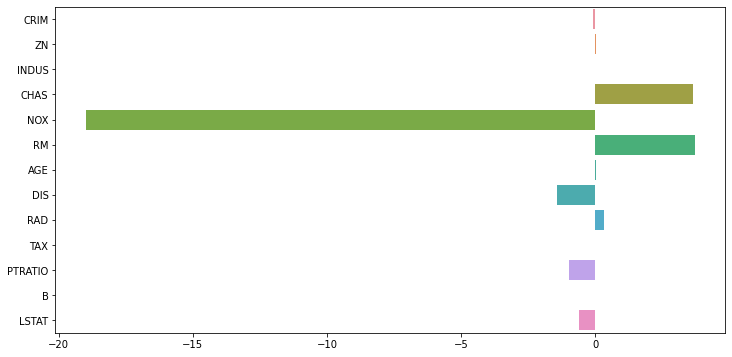

In [22]:
plt.figure(figsize = (12, 6))
sns.barplot(x = MR.coef_,
            y = X_train.columns)
plt.show()

# 
# 
# 
# The End
# 
# 
# 